In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 50
tau = 0.02
L = 1.0
h = L/N
c = 1.0

print('Time to move one grid spacing is ',h/c)

coeff = -c*tau/(2.0*h)

print ('Wave circles system in ', L/(c*tau),' steps.')

print ('Coefficient = ',coeff)

print ('Lax stability criterion tau_max = ', h/c)

nStep = 50

Time to move one grid spacing is  0.02
Wave circles system in  50.0  steps.
Coefficient =  -0.5
Lax stability criterion tau_max =  0.02


In [3]:
#
# Initial conditions
#
sigma = 0.1
k_wave = np.pi/sigma
x = np.arange(N)*h - L/2.0

a = np.empty(N)
for i in range(N):
    a[i]=np.cos(k_wave*x[i]) * np.exp(-x[i]**2/(2.0*sigma**2))
    
ip = np.arange(N) + 1
ip[N-1] = 0
im = np.arange(N) - 1
im[0] = N-1

In [4]:
iplot = 1
nplots = 50

In [5]:
aplot = np.empty((N,nplots))
tplot = np.empty(nplots)
aplot[:,0] = np.copy(a)
tplot[0] = 0
plotStep = nStep/nplots + 1

for istep in range(nStep):
    
    a[:] = 0.5*(a[ip]+a[im]) + coeff*(a[ip]-a[im]) # Lax method ... replace a_i^n with average of +/- values
    
    if (istep+1) % plotStep < 1:
        aplot[:,iplot] = np.copy(a)
        tplot[iplot] = (istep+1)*tau
        iplot += 1
        print (istep,' out of ',nStep,' steps completed')

1  out of  50  steps completed
3  out of  50  steps completed
5  out of  50  steps completed
7  out of  50  steps completed
9  out of  50  steps completed
11  out of  50  steps completed
13  out of  50  steps completed
15  out of  50  steps completed
17  out of  50  steps completed
19  out of  50  steps completed
21  out of  50  steps completed
23  out of  50  steps completed
25  out of  50  steps completed
27  out of  50  steps completed
29  out of  50  steps completed
31  out of  50  steps completed
33  out of  50  steps completed
35  out of  50  steps completed
37  out of  50  steps completed
39  out of  50  steps completed
41  out of  50  steps completed
43  out of  50  steps completed
45  out of  50  steps completed
47  out of  50  steps completed
49  out of  50  steps completed


In [6]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

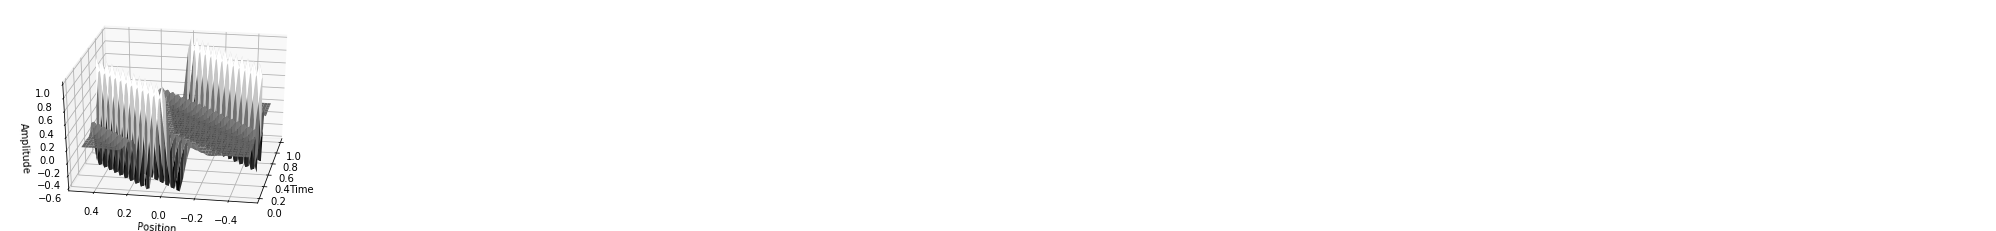

In [7]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
Tp, Xp = np.meshgrid(tplot[0:iplot], x)
ax.plot_surface(Tp,Xp,aplot[:,0:iplot],rstride=1,cstride=1,cmap=cm.gray)
ax.view_init(elev=30.,azim=190.)
ax.set_xlabel('Time')
ax.set_ylabel('Position')
ax.set_zlabel('Amplitude')
plt.show()

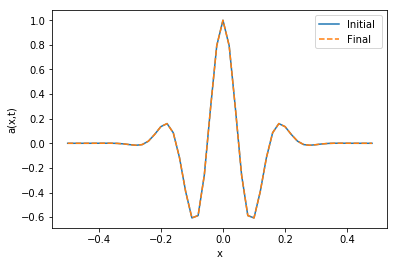

In [8]:
plt.plot(x,aplot[:,0],'-',x,a,'--')
plt.legend(['Initial ','Final'])
plt.xlabel('x')
plt.ylabel('a(x,t)')
plt.show()